In [1]:
# 需要用到的包
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
from matplotlib.ticker import MultipleLocator

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

In [2]:
ds=xr.open_dataset('D:\\WORKcode\\DaQimodel\\ex7\\data\\testdays.cam.h3.0000-01-01-00000.nc')
ds

<xarray.Dataset>
Dimensions:       (lev: 30, ilev: 31, time: 6, lat: 19, lon: 24, slat: 18,
                   slon: 24, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 0000-01-01 00:00:00 ... 0000-01-01 20:00:00
  * lat           (lat) float64 -90.0 -80.0 -70.0 -60.0 ... 60.0 70.0 80.0 90.0
  * lon           (lon) float64 0.0 15.0 30.0 45.0 ... 300.0 315.0 330.0 345.0
  * slat          (slat) float64 -85.0 -75.0 -65.0 -55.0 ... 55.0 65.0 75.0 85.0
  * slon          (slon) float64 -7.5 7.5 22.5 37.5 ... 292.5 307.5 322.5 337.5
Dimensions without coordinates: nbnd
Data variables: (12/50)
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    date          (time) int32 ...
    ...            ...
    LWCF          (time, lat, lon) float32 ...
    NUMICE        (time, lev, lat, lon) float32 ...
    Q             (time, lev, lat, lon) float32 ...
    RELHUM        (time, lev, lat, lon) float32 ...
    SWCF          (time, lat, lon) float32 ...
    T             (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             testdays
    title:            
    logname:          ms_g4
    host:             
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /nuist/p/public/data/CESM_INPUT/atm/cam/inic/fv/cami_00...
    topography_file:  /nuist/p/public/data/CESM_INPUT/atm/cam/topo/USGS-gtopo...

In [3]:
ds['CLDICE'][0,0,:,:]

<xarray.DataArray 'CLDICE' (lat: 19, lon: 24)>
[456 values with dtype=float32]
Coordinates:
    lev      float64 3.643
    time     object 0000-01-01 00:00:00
  * lat      (lat) float64 -90.0 -80.0 -70.0 -60.0 -50.0 ... 60.0 70.0 80.0 90.0
  * lon      (lon) float64 0.0 15.0 30.0 45.0 60.0 ... 300.0 315.0 330.0 345.0
Attributes:
    mdims:      1
    units:      kg/kg
    long_name:  Grid box averaged cloud ice amount

In [4]:
# 创建地图
def createmap(ax1):
    # 海岸线
    ax1.coastlines('110m')
    # 标注坐标轴
    ax1.tick_params(labelsize=7)
    ax1.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree(central_longitude=180))
    ax1.set_yticks(np.arange(-90, 91, 20), crs=ccrs.PlateCarree(central_longitude=180))
    # 经纬度格式，把0经度设置不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)
    
# colormap设置
def createCmap(rgbfile,name='example',n=1):
    import numpy as np 
    from matplotlib.colors import ListedColormap
    with open(rgbfile,'r') as f:
        ca=f.readlines()
    for j,i in enumerate(ca) :
        pan=('r' in i,'g' in i,'b' in i)
        if all(pan):
            skiprows=j+1
    colors=np.loadtxt(rgbfile,skiprows=skiprows,dtype=np.int64)
    if n==1:
        n=len(colors)
    colorlist=[]
    for i in range(len(colors)):
        colorlist.append(tuple(colors[i,:]/256))
    cm = ListedColormap(
        colorlist,  
        name=name,
        N = n)
    return cm

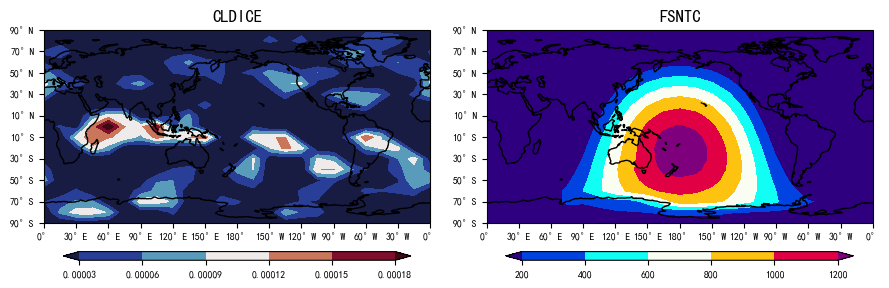

In [28]:
lon=ds.lon.data
lat=ds.lat.data
fig=plt.figure(figsize=(9,6))
ax1,ax2=fig.subplots(1,2,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
createmap(ax1)
createmap(ax2)
ax1.set_title('CLDICE')
ax2.set_title('FSNTC')
CLDICE,lon1=add_cyclic_point(ds['CLDICE'][0,:,:,:].sum(dim=['lev']),coord=lon)
FSNTC,lon1=add_cyclic_point(ds['FSNTC'][0,:,:],coord=lon)
colorbar=ax1.contourf(lon1,lat,CLDICE,cmap=createCmap('./cmocean_balance.rgb'),zorder=0,extend='both',transform=ccrs.PlateCarree())
cb=plt.colorbar(colorbar,shrink=0.9,aspect=40,pad=0.05,ax=ax1,orientation='horizontal')
cb.ax.tick_params(labelsize=7)
colorbar=ax2.contourf(lon1,lat,FSNTC,cmap=createCmap('./NCV_jaisnd.rgb'),zorder=0,extend='both',transform=ccrs.PlateCarree())
cb=plt.colorbar(colorbar,shrink=0.9,aspect=40,pad=0.05,ax=ax2,orientation='horizontal')
cb.ax.tick_params(labelsize=7)
plt.tight_layout()
plt.savefig('./outpic/out.png',dpi=300,bbox_inches='tight')

In [26]:
dir(cb.ax)

['ArtistList',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbar',
 '_colorbar_info',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes

In [24]:
help(cb)

Help on Colorbar in module matplotlib.colorbar object:

class Colorbar(builtins.object)
 |  Colorbar(ax, mappable=None, *, cmap=None, norm=None, alpha=None, values=None, boundaries=None, orientation='vertical', ticklocation='auto', extend=None, spacing='uniform', ticks=None, format=None, drawedges=False, filled=True, extendfrac=None, extendrect=False, label='')
 |  
 |  Draw a colorbar in an existing axes.
 |  
 |  Typically, colorbars are created using `.Figure.colorbar` or
 |  `.pyplot.colorbar` and associated with `.ScalarMappable`\s (such as an
 |  `.AxesImage` generated via `~.axes.Axes.imshow`).
 |  
 |  In order to draw a colorbar not associated with other elements in the
 |  figure, e.g. when showing a colormap by itself, one can create an empty
 |  `.ScalarMappable`, or directly pass *cmap* and *norm* instead of *mappable*
 |  to `Colorbar`.
 |  
 |  Useful public methods are :meth:`set_label` and :meth:`add_lines`.
 |  
 |  Attributes
 |  ----------
 |  ax : `~matplotlib.axes

In [6]:
ds=xr.open_dataset('D:\\WORKcode\\DaQimodel\\ex7\\data\\testdays.cam.h3.0000-01-01-00000one.nc')
ds

<xarray.Dataset>
Dimensions:       (lev: 30, ilev: 31, time: 8, lat: 19, lon: 24, slat: 18,
                   slon: 24, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 0000-01-01 00:00:00 ... 0000-01-01 21:00:00
  * lat           (lat) float64 -90.0 -80.0 -70.0 -60.0 ... 60.0 70.0 80.0 90.0
  * lon           (lon) float64 0.0 15.0 30.0 45.0 ... 300.0 315.0 330.0 345.0
  * slat          (slat) float64 -85.0 -75.0 -65.0 -55.0 ... 55.0 65.0 75.0 85.0
  * slon          (slon) float64 -7.5 7.5 22.5 37.5 ... 292.5 307.5 322.5 337.5
Dimensions without coordinates: nbnd
Data variables: (12/50)
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    date          (time) int32 ...
    ...            ...
    LWCF          (time, lat, lon) float32 ...
    NUMICE        (time, lev, lat, lon) float32 ...
    Q             (time, lev, lat, lon) float32 ...
    RELHUM        (time, lev, lat, lon) float32 ...
    SWCF          (time, lat, lon) float32 ...
    T             (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             testdays
    title:            
    logname:          ms_g4
    host:             
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /nuist/p/public/data/CESM_INPUT/atm/cam/inic/fv/cami_00...
    topography_file:  /nuist/p/public/data/CESM_INPUT/atm/cam/topo/USGS-gtopo...

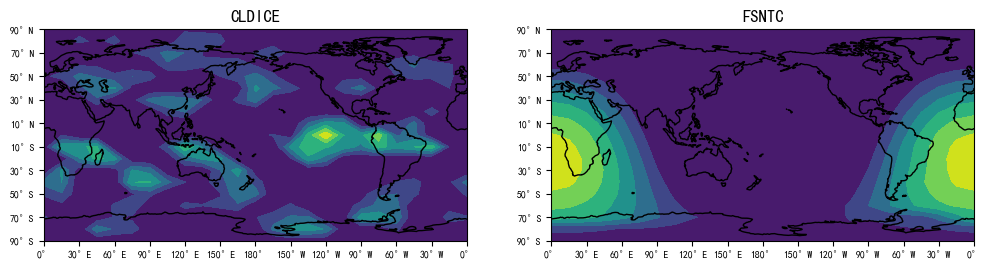

In [7]:
lon=ds.lon.data
lat=ds.lat.data
fig=plt.figure(figsize=(12,6))
ax1,ax2=fig.subplots(1,2,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
createmap(ax1)
createmap(ax2)
ax1.set_title('CLDICE')
ax2.set_title('FSNTC')
CLDICE,lon1=add_cyclic_point(ds['CLDICE'][0,:,:,:].sum(dim=['lev']),coord=lon)
FSNTC,lon1=add_cyclic_point(ds['FSNTC'][0,:,:],coord=lon)
ax1.contourf(lon1,lat,CLDICE)
ax2.contourf(lon1,lat,FSNTC)